<a href="https://colab.research.google.com/github/jsh1021902/CUAI_DeepLearning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%A0%95%EC%84%9C%ED%98%84_2%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 퍼셉트론

## 2.1 퍼셉트론이란?

- **퍼셉트론** (perceptron) : 1957년에 프랑크 로젠블라트가 고안한 신경망의 기원이 되는 알고리즘  
→ **다수의 신호를 입력으로 받아 하나의 신호를 출력**

- $x_{1}$과 $x_{2}$ : 입력 신호
- $y$ : 출력 신호
- $w_{1}$과 $w_{2}$ : 가중치 
- 뉴런(노드)

→ 입력 신호에 고유한 **가중치**를 곱해 총합이 정해진 한계를 넘어서면 1을 출력  
- **임계값** : 정해진 한계, $\theta$(세타)로 나타냄 

이를 수식으로 나타내면 아래와 같음

$y = \begin{cases}
0, & (w_1 x_1 + w_2 x_2 \leq \theta) \\
1, & (w_1 x_1 + w_2 x_2 > \theta)
\end{cases}$

→ 퍼셉트론 : 복수의 입력 신호 **각각에 고유한 가중치를 부여**  
→ **가중치** : 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용  
(즉, 가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻함)

## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트

- **AND 게이트** : 입력이 둘이고 출력은 하나
- **진리표** : 입력 신호와 출력 신호의 대응 표   
→ 두 입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력 
  
- 퍼셉트론으로 AND 게이트 표현 : $w_{1}$, $w_{2}$, $\theta$의 값 필요


### 2.2.2 NAND 게이트와 OR 게이트

- **NAND** : Not AND 의미 → 동작 : AND 게이트의 출력 뒤집은 것  
→ $x_{1}$과 $x_{2}$ 모두 1일 때만 0을 출력하고, 그 외에는 1을 출력  
- **NAND 게이트** : AND 게이트를 구현하는 매개변수의 부호를 모두 반전
- **OR 게이트** : 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리회로

- **퍼셉트론의 구조** : AND, NAND, OR 게이트 **모두에서 똑같음**
- 세 가지 게이트에서 **다른 것** : **매개변수 (가중치와 임계값)의 값** 뿐
  
→ 똑같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정하여 AND, NAND, OR로 변신

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

- $x_{1}$과 $x_{2}$를 인수로 받는 AND 함수

In [ ]:
import numpy as np

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7     # 매개변수 w1, w2, theta는 함수 안에서 초기화
    tmp = x1 * w1 + x2 * w2           
    if tmp <= theta:                  # 가중치를 곱한 입력의 총합이 임계값을 넘으면 1을 반환하고 그 외에는 0을 반환
        return 0
    elif tmp > theta:
        return 1

print('AND(0, 0) :', AND(0, 0))       # 0을 출력
print('AND(1, 0) :', AND(1, 0))       # 0을 출력
print('AND(0, 1) :', AND(0, 1))       # 0을 출력
print('AND(1, 1) :', AND(1, 1))       # 1을 출력

AND(0, 0) : 0
AND(1, 0) : 0
AND(0, 1) : 0
AND(1, 1) : 1


### 2.3.2 가중치와 편향 도입

$\theta$를 -b로 치환했을 때

$y = \begin{cases}
0, & (b + w_1 x_1 + w_2 x_2 \leq 0) \\
1, & (b + w_1 x_1 + w_2 x_2 > 0)
\end{cases}$
  
- b : **편향**
- $w_1$과 $w_2$ : 가중치

→ 입력 신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력

In [ ]:
x = np.array([0, 1])        # 입력
w = np.array([0.5, 0.5])    # 가중치
b = -0.7                    # 편향

print(w * x)                # 두 배열의 원소 수가 같아 각 원소끼리 곱함 → ([0, 1] x [0.5, 0.5] → [0, 0.5])
print(np.sum(w * x))        # 가중치를 곱한 입력의 총합 : 0.5
print(np.sum(w * x) + b)    # 입력신호에 가중치를 곱한 값과 편향의 합 : -0.2

[0.  0.5]
0.5
-0.19999999999999996


### 2.3.3 가중치와 편향 구현하기

- **가중치와 편향을 도입한** AND 게이트

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])    # 가중치 w1, w2 : 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수       
    b = -0.7                    # 편향 b : 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수
    tmp = np.sum(w * x) + b     # b = -0.7이므로 각 입력 신호에 가중치를 곱한 값들의 합이 0.7 초과할 때만 뉴런 활성화
    if tmp <= 0:                # -theta → 편향 b로 치환됨
        return 0
    else:
        return 1

print("AND")
print(AND(0, 0))                # 0
print(AND(0, 1))                # 0
print(AND(1, 0))                # 0
print(AND(1, 1))                # 1

AND
0
0
0
1


- **가중치와 편향을 도입한** NAND 게이트와 OR 게이트

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])  # AND와는 가중치(w, b)만 다르다
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])  # AND와는 가중치(w, b)만 다르다
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print("NAND")
print(NAND(0, 0))             # 1
print(NAND(0, 1))             # 1
print(NAND(1, 0))             # 1
print(NAND(1, 1))             # 0

print("OR")
print(OR(0, 0))               # 0
print(OR(0, 1))               # 1
print(OR(1, 0))               # 1
print(OR(1, 1))               # 1

NAND
1
1
1
0
OR
0
1
1
1


- NAND와 OR 게이트의 코드에서 AND와 다른 곳 : **가중치와 편향 값을 설정하는 부분** 뿐

## 2.4 퍼셉트론의 한계

### 2.4.1 도전! XOR 게이트

- **XOR 게이트** : **배타적 논리합**이라는 논리 회로  
→ $x_{1}$과 $x_{2}$ 중 **한 쪽이 1일 때만** 1을 출력  
(**배타적** : 자기 외에는 거부한다)

### 2.4.2 선형과 비선형

- **XOR게이트**는 단층(선형 : 직선의 영역) 퍼셉트론으로는 구현 불가능  
→ 단층 퍼셉트론으로는 **비선형 영역(곡선의 영역)을 분리할 수 없음**  
→ **다층 퍼셉트론**(multi-layer perceptron)을 통해 구현 가능


In [ ]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


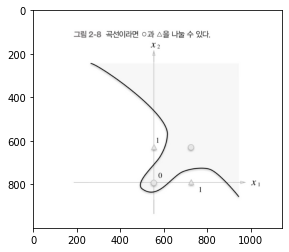

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/XOR게이트.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                            # 읽어온 이미지 표시
plt.show()

## 2.5 다층 퍼셉트론이 출동한다면

- **XOR게이트**는 단층(선형 : 직선의 영역) 퍼셉트론으로는 구현 불가능  
→ **다층 퍼셉트론**(multi-layer perceptron)을 통해 구현 가능


### 2.5.1 기존 게이트 조합하기

**XOR 게이트 만드는 방법** 중 하나 : AND, NAND, OR 게이트를 조합  
※ NAND 게이트 출력부에 있는 o 기호 : 출력을 반전한다는 뜻

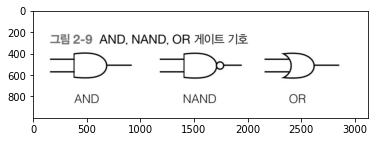

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/게이트기호.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                  # 읽어온 이미지 표시
plt.show()

- NAND의 출력을 $s_{1}$, OR의 출력을 $s_{2}$로 설정

In [ ]:
# XOR(x1, x2) = AND(NAND(x1, x2), OR(x1, x2))

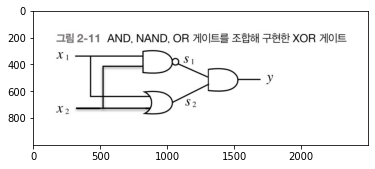

In [ ]:
img2 = imread('/content/drive/My Drive/CUAI_딥러닝/게이트조합.png')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img2)
plt.show()

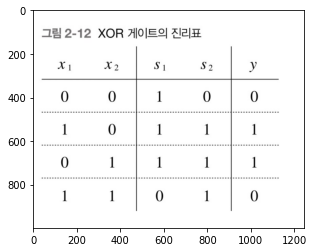

In [24]:
img3 = imread('/content/drive/My Drive/CUAI_딥러닝/XOR진리표.png')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img3)
plt.show()

### 2.5.2 XOR 게이트 구현하기

In [ ]:
def XOR(x1, x2):                # XOR 함수를 함수 AND, NAND, OR를 사용해 구현
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y


print("XOR")
print(XOR(0, 0))  # 0
print(XOR(0, 1))  # 1
print(XOR(1, 0))  # 1
print(XOR(1, 1))  # 0

# XOR은 2층 퍼셉트론이다.
# 2층 퍼셉트론(=비선형 시그노이드 함수)를 활성화 함수로 사용하면
# 임의의 함수를 표현할 수 있다는 사실이 증명되어 있다.


XOR
0
1
1
0


- **다층 퍼셉트론** : 층이 여러 개인 퍼셉트론
- **2층 퍼셉트론에서의 동작 방법**
1. 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보냄
2. 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력

## 2.6 NAND에서 컴퓨터까지

- **퍼셉트론**(NAND 게이트)으로 컴퓨터 표현 가능   
= 컴퓨터도 퍼셉트론처럼 입력과 출력으로 구성된 특정 규칙대로 계산을 수행함

→ 퍼셉트론은 **층을 거듭 쌓으면** **비선형적인 표현** 가능